In [3]:
# default quiskit imports below
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [4]:
# additional imports
import numpy as np

# Decoherence

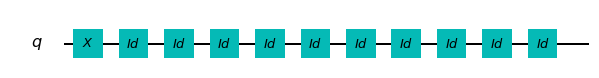

In [5]:
# Decoherence test, 1 qubit with one X and then multiple IDs
circ_1 = QuantumCircuit(1)
circ_1.x(0)
for i in range(10):
    circ_1.iden(0)
circ_1.draw()

In [6]:
# execution with a simulator backend
backend = Aer.get_backend('statevector_simulator')
job = execute(circ_1, backend)
result = job.result()
outputstate = result.get_statevector(circ_1, decimals=3)

print(outputstate)

[0.+0.j 1.+0.j]


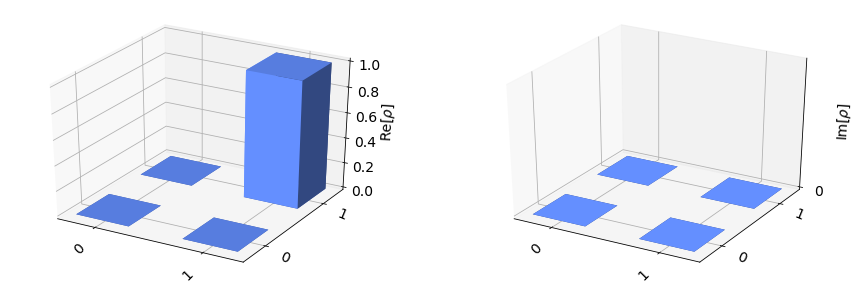

In [7]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

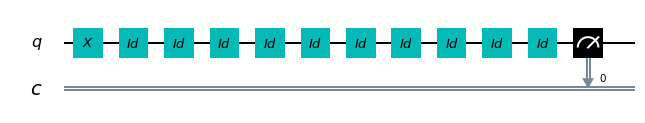

In [8]:
# we add classical state for measurements
circ_q = QuantumCircuit(1, 1)
circ_q.x(0)
for i in range(10):
    circ_q.iden(0)
circ_q.measure(0,0)
circ_q.draw()

In [9]:
# IBMQ.providers()
provider = IBMQ.get_provider(group='open')
# provider.backends()
backend_q = provider.get_backend('ibmq_burlington')


In [10]:
# execution on a quantum machine
job_q = execute(circ_q, backend_q)

from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


In [11]:
result_q = job_q.result()
counts_q = result_q.get_counts(circ_q)
print(counts_q)

{'1': 805, '0': 219}


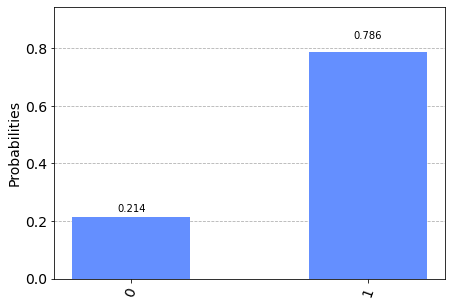

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_q)

Jak widać powyżej, dla symulatora takiego prostego układu otrzymujemy wynik stan 1 ze stuprocentową pewnością. Dla tego samego układu badanego na prawdziwym komputerze kwantowym jednak widać, że pojawiają się również 0 w wynikach. Po kilkukrotnym wykonaniu tego notatnika można było ich zaobserwować kilka do kilkunastu procent.  
Jest to efekt dekoherencji kwantowej wynikającej z niezerowego błędu występującego na każdej bramce kwantowej.  
Jest to również przykład różnicy pomiędzy histogramem z symulatora oraz histogramem z prawdziwego komputera kwantowego.

# Amplitudy

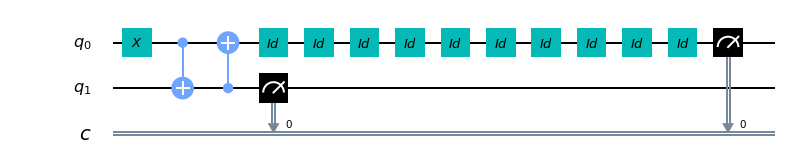

In [20]:
cq = QuantumCircuit(2, 1)
cq.x(0)
cq.cx(0, 1)
cq.cx(1, 0)
for i in range(10):
    cq.iden(0)
cq.measure(0,0)
cq.measure(1,0)
cq.draw()

In [21]:
# execution on a quantum machine
job_q2 = execute(cq, backend_q)

from qiskit.tools.monitor import job_monitor
job_monitor(job_q2)

Job Status: job has successfully run


In [22]:
result_q2 = job_q2.result()
counts_q2 = result_q.get_counts(cq)
print(counts_q2)

QiskitError: 'Data for experiment "circuit7" could not be found.'